<a href="https://colab.research.google.com/github/realyou0312/AED_Project/blob/main/%EB%8B%A4%EC%A4%91%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 



In [ ]:
path = '/content/drive/MyDrive/공빅 프로젝트/수요예측 관련 데이터/JEJU_CSV/'

In [ ]:
# /content/drive/MyDrive/공빅 프로젝트/수요예측 관련 데이터/JEJU_CSV/3km_feature_final.csv

In [ ]:
file = pd.read_excel(path + '3km_feature_final.xlsx')
file2 = pd.read_csv('/content/drive/MyDrive/공빅 프로젝트/코드/final_feature.csv', encoding='cp949')

In [ ]:
file.head()

,id,left,top,right,bottom,YACHT,WIFI,TOUR,SAMDASOO,RELIGION,LIFESAVING,FOOD,CAR,CAFE,BUS,ACCOMODATI,ACCIDENT,Y_INDEX,X_INDEX,SPO_NO_CD,SPO_NO_250,명칭,주소,Latitude,Longitude,방문객
0,231,126.465348,33.497064,126.500568,33.463280,0,60225,8,0,4,0,86,21,4,132,173,365,1498125.0,906375.0,다나0698,다나06A98B,한라수목원,제주시 수목원길 72,126.493245,33.469927,800000.0
1,286,126.535787,33.260578,126.571007,33.226794,1,160600,14,0,2,0,1,0,1,89,140,160,1473375.0,912625.0,다나1273,다나12B73C,천지연폭포,서귀포시 천지동 667-7,126.561285,33.247905,710727.0
2,283,126.535787,33.361929,126.571007,33.328145,0,0,0,0,0,0,0,0,0,0,0,0,1482625.0,913125.0,다나1382,다나13C82A,한라산국립공원,서귀포시 상효동 산220-1,126.567357,33.330692,673866.0
3,447,126.782324,33.497064,126.817544,33.463280,0,3285,6,0,0,0,0,0,1,15,5,0,1500125.0,936125.0,다다3600,다다36A00A,비자림,제주시 구좌읍 비자숲길 55,126.811388,33.491317,607384.0
4,328,126.606227,33.463280,126.641446,33.429496,0,23725,9,0,0,0,1,0,0,11,2,0,1494625.0,918875.0,다나1894,다나18C94D,절물자연휴양림,제주시 명림로 584,126.628448,33.439373,545323.0


In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          64 non-null     int64  
 1   left        64 non-null     float64
 2   top         64 non-null     float64
 3   right       64 non-null     float64
 4   bottom      64 non-null     float64
 5   YACHT       64 non-null     int64  
 6   WIFI        64 non-null     int64  
 7   TOUR        64 non-null     int64  
 8   SAMDASOO    64 non-null     int64  
 9   RELIGION    64 non-null     int64  
 10  LIFESAVING  64 non-null     int64  
 11  FOOD        64 non-null     int64  
 12  CAR         64 non-null     int64  
 13  CAFE        64 non-null     int64  
 14  BUS         64 non-null     int64  
 15  ACCOMODATI  64 non-null     int64  
 16  ACCIDENT    64 non-null     int64  
 17  Y_INDEX     64 non-null     int64  
 18  X_INDEX     64 non-null     int64  
 19  SPO_NO_CD   64 non-null     obj

In [ ]:
file['방문객'] = file['방문객'].fillna(0)

In [ ]:
file.describe()

,id,left,top,right,bottom,YACHT,WIFI,TOUR,SAMDASOO,RELIGION,LIFESAVING,FOOD,CAR,CAFE,BUS,ACCOMODATI,ACCIDENT,Y_INDEX,X_INDEX,Latitude,Longitude
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,6.400000e+01,64.000000,64.000000,64.000000
mean,295.015625,126.555048,33.399408,126.590268,33.365624,0.203125,27597.421875,5.265625,0.125000,1.203125,0.140625,5.781250,1.500000,1.078125,36.609375,34.187500,44.343750,1.488387e+06,913964.843750,126.575129,33.383385
std,128.384281,0.190536,0.107023,0.190536,0.107023,0.405505,48123.549815,4.048289,0.454257,2.190743,1.125000,16.218223,5.673665,2.117986,35.728525,65.768443,88.724331,1.179037e+04,17701.692995,0.189663,0.107012
min,66.000000,126.218812,33.193010,126.254031,33.159226,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.464875e+06,882625.000000,126.239036,33.170018
25%,202.000000,126.421324,33.294361,126.456544,33.260578,0.000000,2920.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,2.000000,0.000000,1.475750e+06,902437.500000,126.450236,33.270223
50%,286.000000,126.535787,33.429496,126.571007,33.395713,0.000000,8030.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,25.500000,5.000000,3.500000,1.491500e+06,913000.000000,126.566061,33.412408
75%,352.000000,126.641446,33.463280,126.676666,33.429496,0.000000,16607.500000,7.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,53.000000,24.000000,30.000000,1.496375e+06,922125.000000,126.661524,33.458514
max,567.000000,126.958422,33.564632,126.993641,33.530848,1.000000,160600.000000,14.000000,3.000000,10.000000,9.000000,86.000000,24.000000,9.000000,132.000000,253.000000,365.000000,1.505875e+06,950375.000000,126.964959,33.542718


In [ ]:
file.columns

Index(['id', 'left', 'top', 'right', 'bottom', 'YACHT', 'WIFI', 'TOUR',
       'SAMDASOO', 'RELIGION', 'LIFESAVING', 'FOOD', 'CAR', 'CAFE', 'BUS',
       'ACCOMODATI', 'ACCIDENT', 'Y_INDEX', 'X_INDEX', 'SPO_NO_CD',
       'SPO_NO_250', '명칭', '주소', 'Latitude', 'Longitude', '방문객'],
      dtype='object')

In [ ]:
file.drop(['id', 'left', 'top', 'right', 'bottom', 'Y_INDEX', 'X_INDEX', 'SPO_NO_CD', 'SPO_NO_250', '명칭', '주소', 'Latitude', 'Longitude'], axis=1, inplace=True)

In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YACHT       64 non-null     int64 
 1   WIFI        64 non-null     int64 
 2   TOUR        64 non-null     int64 
 3   SAMDASOO    64 non-null     int64 
 4   RELIGION    64 non-null     int64 
 5   LIFESAVING  64 non-null     int64 
 6   FOOD        64 non-null     int64 
 7   CAR         64 non-null     int64 
 8   CAFE        64 non-null     int64 
 9   BUS         64 non-null     int64 
 10  ACCOMODATI  64 non-null     int64 
 11  ACCIDENT    64 non-null     int64 
 12  방문객         64 non-null     object
dtypes: int64(12), object(1)
memory usage: 6.6+ KB


In [ ]:
file['방문객'] = file['방문객'].str.replace(',','')
file['방문객'] = file['방문객'].astype(float)

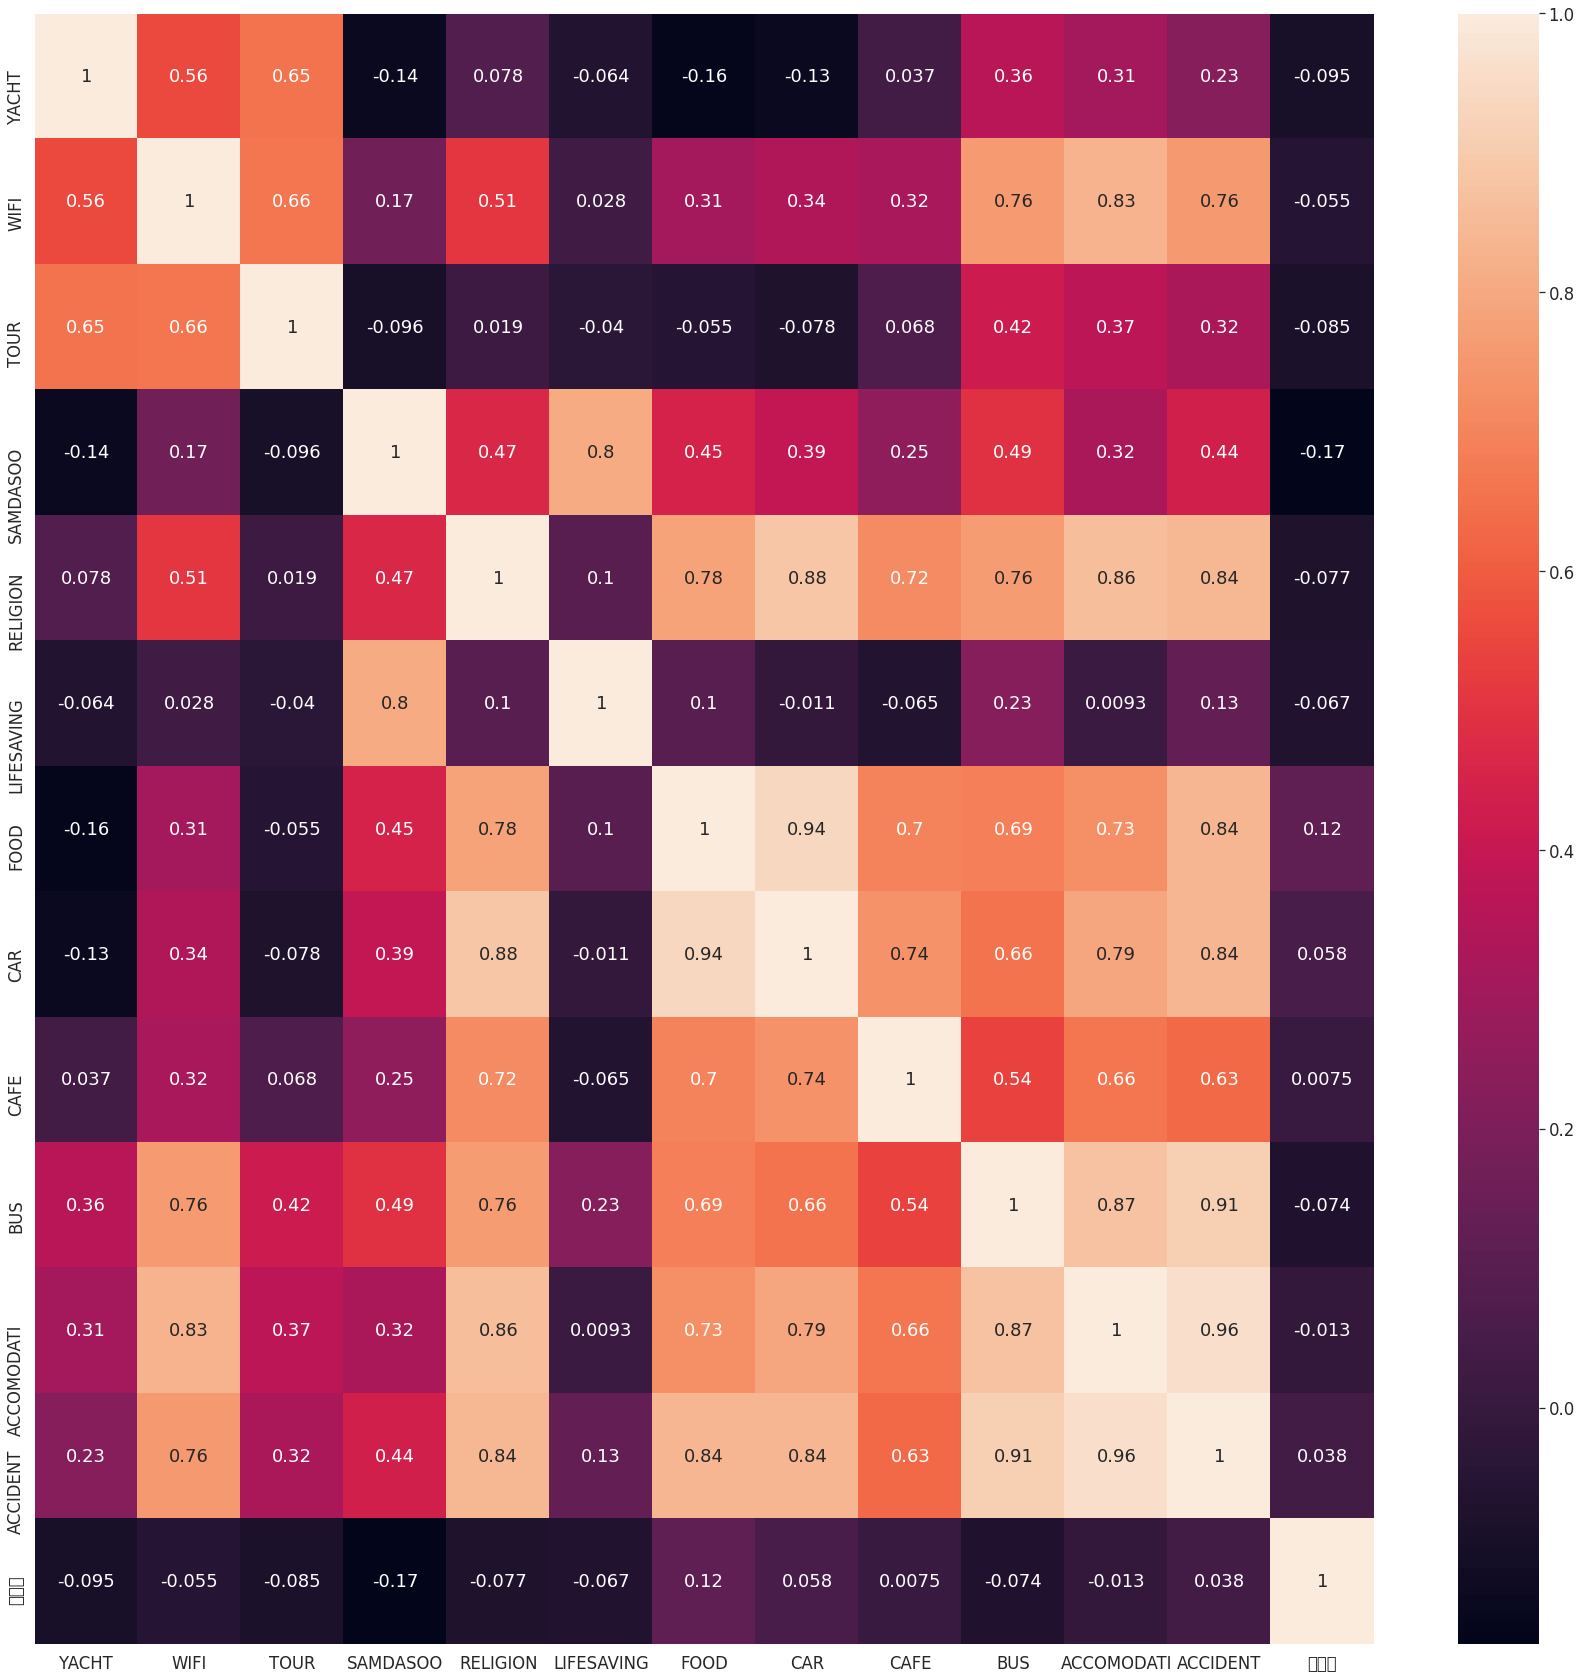

In [ ]:
import warnings 
warnings.filterwarnings(action='ignore')
import seaborn as sns
sns.set(font_scale=1.5) 
plt.figure(figsize=(30,30))
plt.rc('font', family='NanumBarunGothic') 
sns.heatmap(file.corr(), annot= True, fmt ='0.2g')
# plt.show()

#변수선택

In [ ]:
data = file.copy()

In [ ]:
num_temp = data.drop('방문객', axis=1)

In [ ]:
num_temp = pd.DataFrame(columns = list(num_temp), data = StandardScaler().fit_transform(num_temp))
# sc_list = list(data.columns)[1:]
# X_train_scaled = scaler.fit(data[sc_list])

In [ ]:
num_temp

,YACHT,WIFI,TOUR,SAMDASOO,RELIGION,LIFESAVING,FOOD,CAR,CAFE,BUS,ACCOMODATI,ACCIDENT
0,-0.504878,0.683356,0.680779,-0.27735,1.286771,-0.125988,4.985312,3.464102,1.390459,2.690979,2.127310,3.642644
1,1.980676,2.785622,2.174603,-0.27735,0.366622,-0.125988,-0.297138,-0.266469,-0.037178,1.477945,1.621583,1.313851
2,-0.504878,-0.578004,-1.310986,-0.27735,-0.553527,-0.125988,-0.359284,-0.266469,-0.513057,-1.032754,-0.523925,-0.503743
3,-0.504878,-0.509202,0.182838,-0.27735,-0.553527,-0.125988,-0.359284,-0.266469,-0.037178,-0.609603,-0.447300,-0.503743
4,-0.504878,-0.081104,0.929750,-0.27735,-0.553527,-0.125988,-0.297138,-0.266469,-0.513057,-0.722443,-0.493275,-0.503743
...,...,...,...,...,...,...,...,...,...,...,...,...
59,-0.504878,-0.470979,-0.564074,-0.27735,-0.093453,-0.125988,-0.359284,-0.266469,-0.513057,-0.524972,-0.462625,-0.469664
60,-0.504878,-0.363955,0.182838,-0.27735,-0.553527,-0.125988,-0.359284,-0.266469,-0.513057,-0.242871,-0.493275,-0.424224
61,1.980676,2.785622,2.174603,-0.27735,0.366622,-0.125988,-0.297138,-0.266469,-0.037178,1.477945,1.621583,1.313851
62,1.980676,2.785622,2.174603,-0.27735,0.366622,-0.125988,-0.297138,-0.266469,-0.037178,1.477945,1.621583,1.313851


In [ ]:
train_y = data.방문객
scl_train = num_temp

In [ ]:
temp_list = list(scl_train)

In [ ]:
anova_data = pd.DataFrame(columns = list(scl_train), data = scl_train)
anova_data = anova_data[temp_list].copy()
lm = sm.OLS(train_y.values, anova_data[list(anova_data)])
results = lm.fit()
results_summary = results.summary()
results_as_html = results_summary.tables[1].as_html()
result_summary = pd.DataFrame(pd.read_html(results_as_html, header=0, index_col=0)[0])
print(result_summary[result_summary['P>|t|'] < 0.005].index.tolist())

[]


In [ ]:
results_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.116
Model:                            OLS   Adj. R-squared (uncentered):             -0.088
Method:                 Least Squares   F-statistic:                             0.5681
Date:                Mon, 09 Aug 2021   Prob (F-statistic):                       0.857
Time:                        07:23:16   Log-Likelihood:                         -889.94
No. Observations:                  64   AIC:                                      1804.
Df Residuals:                      52   BIC:                                      1830.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
YACHT      -3782.2834   5.98e+04     -0.063      0.950   -1.24e+05    1.16e+05
WIFI       -2.606e+04   3.15e+05     -0.083      0.934   -6.57e+05    6.05e+05
TOUR       -4.453e+04   6.65e+04     -0.669      0.506   -1.78e+05     8.9e+04
SAMDASOO    -1.24e+05   9.89e+04     -1.254      0.215   -3.22e+05    7.44e+04
RELIGION    -5.45e+04   1.38e+05     -0.395      0.694   -3.31e+05    2.22e+05
LIFESAVING  6.726e+04   8.96e+04      0.750      0.456   -1.13e+05    2.47e+05
FOOD        1.525e+04   2.16e+05      0.071      0.944   -4.17e+05    4.48e+05
CAR        -5.629e+04   3.47e+05     -0.162      0.872   -7.52e+05    6.39e+05
CAFE        2.478e+04   7.36e+04      0.337      0.738   -1.23e+05    1.72e+05
BUS          -8.1e+04   1.31e+05     -0.618      0.539   -3.44e+05    1.82e+05
ACCOMODATI -1.009e+05   4.93e+05     -0.204      0.839   -1.09e+06    8.89e+05
ACCIDENT    3.235e+05   4.14e+05      0.781      0.438   -5.08e+05    1.15e+06
==============================================================================
Omnibus:                       10.572   Durbin-Watson:                   0.166
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.146
Skew:                           1.016   Prob(JB):                      0.00380
Kurtosis:                       3.226   Cond. No.                         44.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
scaler = StandardScaler()
# X_train = data.loc[:,['YACHT', 'WIFI', 'TOUR', 'RELIGION', 'FOOD', 'CAR', 'BUS', 'ACCIDENT', 'ACCOMODATION']]
X_train = data.loc[:,['YACHT', 'WIFI', 'TOUR', 'FOOD', 'CAR', 'BUS', 'ACCIDENT', 'ACCOMODATION']]
X_train = scaler.fit_transform(X_train)

KeyError: ignored

In [ ]:

y_train = data['방문객수']

In [ ]:
X_train

In [ ]:
# X_train_corr = X_train.corr()
# X_train_corr

In [ ]:
# plt.rcParams['figure.figsize']=(15,10)

# sns.heatmap(X_train_corr, annot=True, cmap='Reds')

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = model.score(X_test, y_test)

In [ ]:
accuracy

In [ ]:
model.coef_

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error


In [ ]:
MAE =  mean_absolute_error(y_test, y_pred)

MSE = mean_squared_error(y_test, y_pred)


RMSE = np.sqrt(MSE)

MSLE = mean_squared_log_error(y_test, y_pred)

RMSLE = np.sqrt(mean_squared_log_error(y_test, y_pred))

R2 = r2_score(y_test, y_pred)


In [ ]:
MAE

In [ ]:
MSE